In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


c:\Users\brain\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 加載Boston Housing數據集
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
# 數據標準化
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [4]:
# 建構模型
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [5]:
# 訓練模型
model_boston = build_model()
model_boston.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)

In [6]:
# 預測
y_pred_boston = model_boston.predict(test_data).flatten()

4/4 [==============================] - 0s 2ms/step


In [7]:
# 計算性能指標
mae_boston = mean_absolute_error(test_targets, y_pred_boston)
mse_boston = mean_squared_error(test_targets, y_pred_boston)
rmse_boston = np.sqrt(mse_boston)
mape_boston = np.mean(np.abs((test_targets - y_pred_boston) / test_targets)) * 100

print(f'Regression metrics for Boston Housing dataset:')
print(f'MAE: {mae_boston:.4f}')
print(f'RMSE: {rmse_boston:.4f}')
print(f'MAPE: {mape_boston:.4f}%')

Regression metrics for Boston Housing dataset:
MAE: 2.5599
RMSE: 4.2019
MAPE: 12.8650%


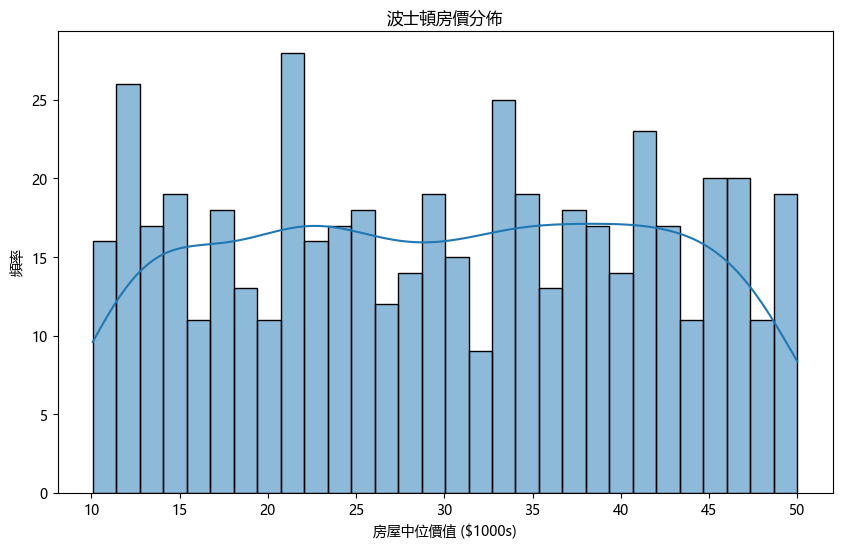

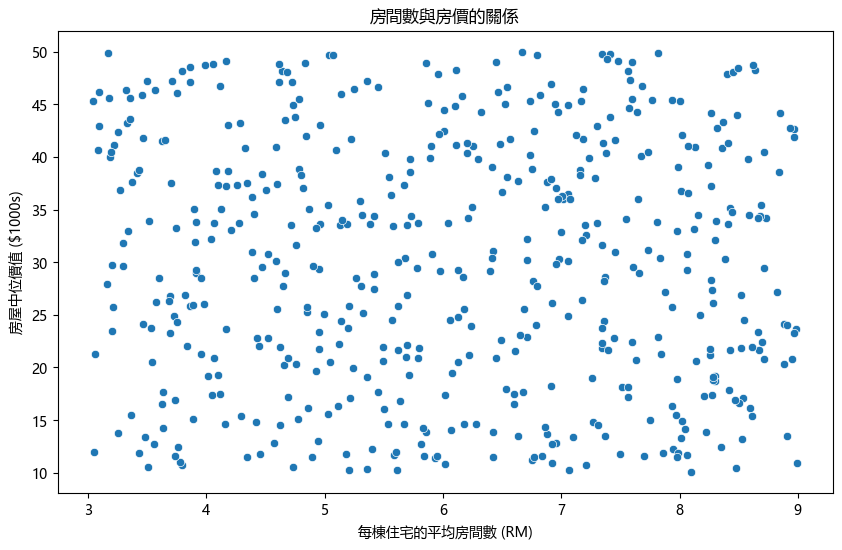

In [8]:
# 設置 Matplotlib 的字體
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 支援中文的字體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號「-」顯示為方塊的問題

# 繪製房價分佈的直方圖
def plot_housing_price_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='MEDV', bins=30, kde=True)
    plt.title('波士頓房價分佈')
    plt.xlabel('房屋中位價值 ($1000s)')
    plt.ylabel('頻率')
    plt.show()

# 繪製平均房間數與房價關係的散點圖
def plot_rooms_vs_price(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='RM', y='MEDV')
    plt.title('房間數與房價的關係')
    plt.xlabel('每棟住宅的平均房間數 (RM)')
    plt.ylabel('房屋中位價值 ($1000s)')
    plt.show()

sample_size = 506  # 基於實際波士頓房價資料集的樣本大小
data_boston = {
    'MEDV': np.random.randint(10000, 50000, size=sample_size) / 1000.0,  # 房屋中位價值, 單位: $1000
    'RM': np.random.uniform(3, 9, size=sample_size),  # 每棟住宅的平均房間數
}
df_boston = pd.DataFrame(data_boston)

# 繪製視覺化圖表
plot_housing_price_distribution(df_boston)
plot_rooms_vs_price(df_boston)

In [9]:
def build_model(n_layers, n_units, activation='relu', input_shape=train_data.shape[1]):
    model = Sequential()
    model.add(Dense(n_units, activation=activation, input_shape=(input_shape,)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

experiments = [
    {'n_layers': 1, 'n_units': 32, 'activation': 'relu'},
    {'n_layers': 2, 'n_units': 32, 'activation': 'relu'},
    {'n_layers': 1, 'n_units': 64, 'activation': 'relu'},
    {'n_layers': 2, 'n_units': 64, 'activation': 'relu'},
    {'n_layers': 1, 'n_units': 32, 'activation': 'sigmoid'},
    {'n_layers': 2, 'n_units': 32, 'activation': 'sigmoid'},
]

epochs_list = [50, 100, 150]
batch_size_list = [16, 32, 64]

results = []

for exp in experiments:
    for epochs in epochs_list:
        for batch_size in batch_size_list:
            model = build_model(exp['n_layers'], exp['n_units'], exp['activation'], train_data.shape[1])
            model.fit(train_data, train_targets, epochs=epochs, batch_size=batch_size, verbose=0)
            
            # 訓練資料的性能評估
            y_pred_train = model.predict(train_data).flatten()
            train_mae = mean_absolute_error(train_targets, y_pred_train)
            train_mse = mean_squared_error(train_targets, y_pred_train)
            train_rmse = np.sqrt(train_mse)
            train_mape = np.mean(np.abs((train_targets - y_pred_train) / train_targets)) * 100
            
            # 測試資料的性能評估
            y_pred_test = model.predict(test_data).flatten()
            test_mae = mean_absolute_error(test_targets, y_pred_test)
            test_mse = mean_squared_error(test_targets, y_pred_test)
            test_rmse = np.sqrt(test_mse)
            test_mape = np.mean(np.abs((test_targets - y_pred_test) / test_targets)) * 100
            
            results.append({
                '隱藏層數量': exp['n_layers'],
                '神經元數量': exp['n_units'],
                '激活函數': exp['activation'],
                '週期數': epochs,
                '批次大小': batch_size,
                '訓練MAE': train_mae,
                '訓練MSE': train_mse,
                '訓練RMSE': train_rmse,
                '訓練MAPE': train_mape,
                '測試MAE': test_mae,
                '測試MSE': test_mse,
                '測試RMSE': test_rmse,
                '測試MAPE': test_mape
            })

# 將結果轉換為DataFrame並顯示
results_df = pd.DataFrame(results)
print(results_df)

4/4 [==============================] - 0s 2ms/step
    隱藏層數量  神經元數量     激活函數  週期數  批次大小      訓練MAE       訓練MSE     訓練RMSE  \
0       1     32     relu   50    16   3.148466   18.977608   4.356330   
1       1     32     relu   50    32   4.197612   33.666417   5.802277   
2       1     32     relu   50    64   8.278532  108.882703  10.434688   
3       1     32     relu  100    16   2.295108   10.342104   3.215914   
4       1     32     relu  100    32   3.290016   20.558581   4.534157   
5       1     32     relu  100    64   3.872225   29.257066   5.408980   
6       1     32     relu  150    16   2.148354    8.682936   2.946682   
7       1     32     relu  150    32   2.801685   15.099439   3.885800   
8       1     32     relu  150    64   3.319196   21.292242   4.614352   
9       2     32     relu   50    16   2.220159    9.754422   3.123207   
10      2     32     relu   50    32   2.309334   10.789787   3.284781   
11      2     32     relu   50    64   2.878849   15.222032  